In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-sep-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-sep-2022/train.csv
/kaggle/input/tabular-playground-series-sep-2022/test.csv


In [184]:
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dataclasses import dataclass

# Set up train and validate dfs

In [3]:
df_raw = pd.read_csv('/kaggle/input/tabular-playground-series-sep-2022/train.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [5]:
train_size = math.ceil(df_raw.shape[0] * .80)

In [6]:
train_size

56103

In [7]:
df_train = df_raw.head(train_size)

In [8]:
df_validate = df_raw.tail(len(df_raw) - train_size)

In [9]:
assert len(df_train) + len(df_validate) == len(df_raw)

# EDA

In [10]:
df_train.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [11]:
df_train.describe()

,row_id,num_sold
count,56103.000000,56103.000000
mean,28051.000000,189.180525
std,16195.685413,126.980382
min,0.000000,19.000000
25%,14025.500000,91.000000
50%,28051.000000,145.000000
75%,42076.500000,273.000000
max,56102.000000,986.000000


## Grouping ops

In [12]:
df_grouped = df_train.groupby(['country', 'store', 'product'])

df_grouped.describe().drop(columns = ['row_id'])

num_sold              \
                                                       count        mean   
country store      product                                                 
Belgium KaggleMart Kaggle Advanced Techniques         1169.0  419.727117   
                   Kaggle Getting Started             1169.0  331.745937   
                   Kaggle Recipe Book                 1169.0  250.982891   
                   Kaggle for Kids: One Smart Goose   1169.0  444.709153   
        KaggleRama Kaggle Advanced Techniques         1169.0  145.734816   
                   Kaggle Getting Started             1169.0  115.124893   
                   Kaggle Recipe Book                 1169.0   87.209581   
                   Kaggle for Kids: One Smart Goose   1169.0  154.707442   
France  KaggleMart Kaggle Advanced Techniques         1169.0  370.952951   
                   Kaggle Getting Started             1169.0  292.045338   
                   Kaggle Recipe Book                 1169.0  221.171086   
                   Kaggle for Kids: One Smart Goose   1169.0  393.396065   
        KaggleRama Kaggle Advanced Techniques         1169.0  128.480753   
                   Kaggle Getting Started             1169.0  101.167665   
                   Kaggle Recipe Book                 1169.0   76.563730   
                   Kaggle for Kids: One Smart Goose   1169.0  136.189906   
Germany KaggleMart Kaggle Advanced Techniques         1169.0  420.204448   
                   Kaggle Getting Started             1169.0  332.138580   
                   Kaggle Recipe Book                 1169.0  252.001711   
                   Kaggle for Kids: One Smart Goose   1169.0  447.198460   
        KaggleRama Kaggle Advanced Techniques         1169.0  146.589393   
                   Kaggle Getting Started             1169.0  115.630453   
                   Kaggle Recipe Book                 1169.0   87.292558   
                   Kaggle for Kids: One Smart Goose   1169.0  155.078700   
Italy   KaggleMart Kaggle Advanced Techniques         1169.0  313.872541   
                   Kaggle Getting Started             1169.0  246.514115   
                   Kaggle Recipe Book                 1169.0  187.089820   
                   Kaggle for Kids: One Smart Goose   1169.0  332.126604   
        KaggleRama Kaggle Advanced Techniques         1169.0  108.680924   
                   Kaggle Getting Started             1169.0   85.557742   
                   Kaggle Recipe Book                 1169.0   64.837468   
                   Kaggle for Kids: One Smart Goose   1169.0  114.765612   
Poland  KaggleMart Kaggle Advanced Techniques         1169.0  155.667237   
                   Kaggle Getting Started             1169.0  120.490163   
                   Kaggle Recipe Book                 1169.0   92.692044   
                   Kaggle for Kids: One Smart Goose   1169.0  163.384089   
        KaggleRama Kaggle Advanced Techniques         1169.0   53.823781   
                   Kaggle Getting Started             1169.0   41.578272   
                   Kaggle Recipe Book                 1169.0   31.911035   
                   Kaggle for Kids: One Smart Goose   1168.0   56.599315   
Spain   KaggleMart Kaggle Advanced Techniques         1168.0  277.574486   
                   Kaggle Getting Started             1168.0  218.343322   
                   Kaggle Recipe Book                 1168.0  165.882705   
                   Kaggle for Kids: One Smart Goose   1168.0  292.547089   
        KaggleRama Kaggle Advanced Techniques         1168.0   96.103596   
                   Kaggle Getting Started             1168.0   75.303938   
                   Kaggle Recipe Book                 1168.0   57.221747   
                   Kaggle for Kids: One Smart Goose   1168.0  101.744863   

                                                                              \
                                                           std    min    25%   
country store  

In [13]:
def group_ops(df:pd.DataFrame) -> pd.DataFrame:
    size = len(df)
    min_date = min(df.date)
    max_date = max(df.date)
    min_target = min(df.num_sold)
    max_target = max(df.num_sold)
    
    out = pd.DataFrame({'num_rows': [size], 
                        'min_date': [min_date], 
                        'max_date': [max_date],
                        'min_target': [min_target], 
                        'max_target': [max_target]
                       })
    return out  

# df_grouped.apply(group_ops)
df_grouped.apply(group_ops).reset_index().drop(columns=['level_3'])

,country,store,product,num_rows,min_date,max_date,min_target,max_target
0,Belgium,KaggleMart,Kaggle Advanced Techniques,1169,2017-01-01,2020-03-14,271,878
1,Belgium,KaggleMart,Kaggle Getting Started,1169,2017-01-01,2020-03-14,211,688
2,Belgium,KaggleMart,Kaggle Recipe Book,1169,2017-01-01,2020-03-14,176,581
3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,1169,2017-01-01,2020-03-14,332,925
4,Belgium,KaggleRama,Kaggle Advanced Techniques,1169,2017-01-01,2020-03-14,88,309
5,Belgium,KaggleRama,Kaggle Getting Started,1169,2017-01-01,2020-03-14,74,252
6,Belgium,KaggleRama,Kaggle Recipe Book,1169,2017-01-01,2020-03-14,60,200
7,Belgium,KaggleRama,Kaggle for Kids: One Smart Goose,1169,2017-01-01,2020-03-14,112,328
8,France,KaggleMart,Kaggle Advanced Techniques,1169,2017-01-01,2020-03-14,235,773
9,France,KaggleMart,Kaggle Getting Started,1169,2017-01-01,2020-03-14,198,625


In [14]:
dates = {}

for group_tuple in df_grouped:
    key = group_tuple[0]
    df = group_tuple[1]
    dates[key] = set(df.date.unique())
    
x = dates[('Belgium', 'KaggleMart', 'Kaggle Advanced Techniques')]
y = dates[('Spain', 'KaggleMart', 'Kaggle Advanced Techniques')]

x ^ y

{'2020-03-14'}

## Plots

In [87]:
kaggle_mart_colours = {
    0: "#ffebee",
    1: "#ffcdd2",
    2: "#ef9a9a",
    3: "#e57373"
}

kaggle_rama_colours = {
    4: "#ede7f6",
    5: "#d1c4e9",
    6: "#b39ddb",
    7: "#9575cd"    
}

colours = {**kaggle_mart_colours, **kaggle_rama_colours}

In [193]:
@dataclass
class PlotParams:
    """Class for plotting params"""
    start: int
    end: int
    date_label_interval: int 


plot_limited = True

if plot_limited:
    params = PlotParams(21, 100, 2)
else: 
    params = PlotParams(0, len(df_train), 60)    

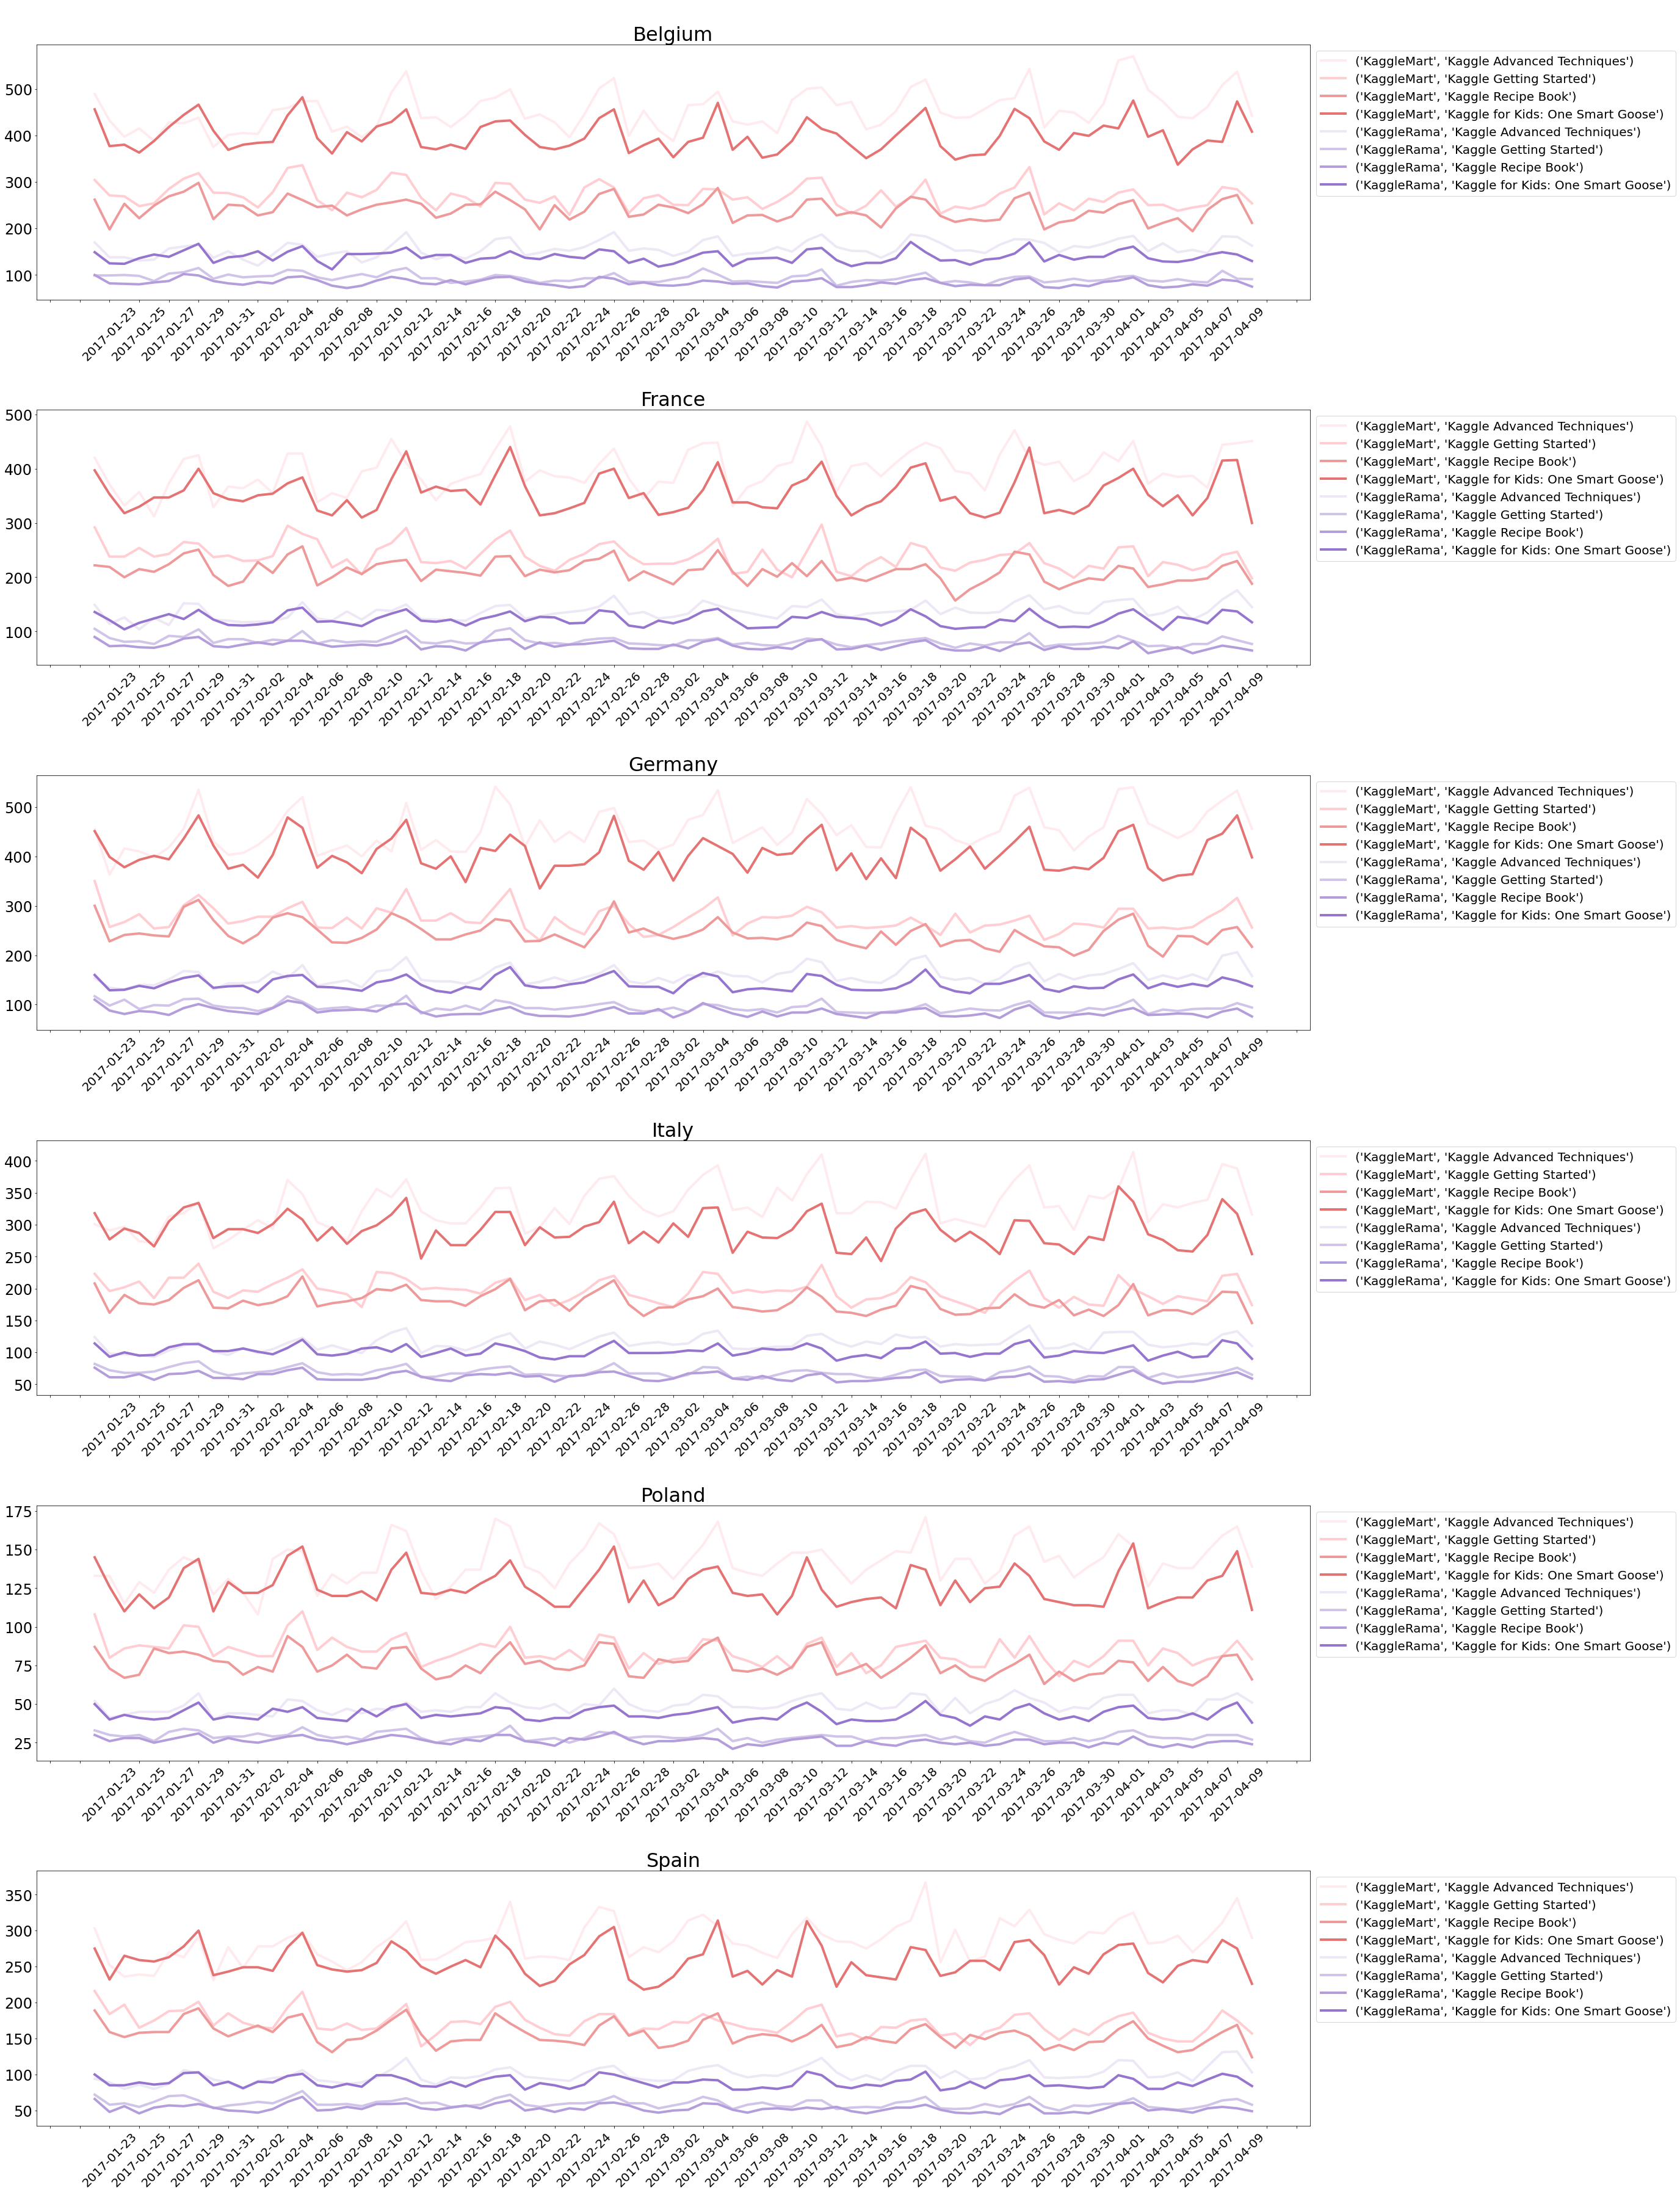

In [194]:
fig = plt.figure(figsize=(30, 50))

for n, group_tuple in enumerate(df_grouped):
    key = group_tuple[0]
    country = '\n' + key[0]
    line_label = key[1:]
    
    df = group_tuple[1].iloc[params.start:params.end, ]
    plot_num = math.ceil((n + 1)/8)
    
    ax = plt.subplot(6, 1, plot_num)
    
    colour_num = n % 8
    ax.plot(df.date, df.num_sold, 
            lw=4, 
            color=colours[colour_num], 
            label=line_label,
           )
    
    ax.set_title(country, size=32)
    
    # xtick interval (using matplotlib.mdates module): 
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=params.date_label_interval))
    
    ax.tick_params(axis='x', labelsize=20, labelrotation=45)
    ax.tick_params(axis='y', labelsize=24)
    
    # make room for legend at the right: 
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # add legend: 
    ax.legend(bbox_to_anchor=(1, 1), prop={'size': 20})

fig.tight_layout()
fig.show()

# EDA summary for feature engineering 

1. In general KaggleMart has more sales than KaggleRama 
1. Italy, Poland and Spain had demand spikes from around 2020-01
1. All countries seem to have demand spikes around the new year (Dec or Jan) 


# Feature engineering

In [196]:
def feature_step_01(x: pd.Series) -> pd.Series: 
    pass 

def feature_step_02(x: pd.Series) -> pd.Series: 
    pass


feature_steps = {
    0: '<defined during eda>',
    1: feature_step_01,
    2: feature_step_02
}



# Training config

In [201]:
class model_01_average_last_x_months: 
    def __init__(self, last_x_months): 
        self.last_x_months = last_x_months
        
    def fit(target: np.array): 
        return np.mean(target)
    
    def predict(): 
        pass 
        

models = {
    1: model_01_average_last_x_months,
    2: '<model_02>',
}

# Training

In [204]:
def train_model(model_num): 
    # read in data 
    train_data = df_train
    
    # feature engineering 
    
    # initialize model:
    m = models.get(model_num)
    
    # fit model: 
    m = m.fit(train_data)
    
    # predict: 
    preds = m.predict()
    
    # evaluate: 
    
    return preds, (metric_01, metric_02)


for model in models.keys(): 
    train_model(model)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


AttributeError: 'Series' object has no attribute 'predict'

# Error analysis 